In [56]:
#import libarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *
import os

In [57]:
#see if gpu is avaible
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [58]:
#get data and filtere it 
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'
test = pd.DataFrame(df)
df =pd.get_dummies(df, prefix=['station' ])

#reading and dumming datta
col = list(df.columns.values)

df = df[['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St', 'anzahl']]

x = df.iloc[:,0:-1].values
y = df.iloc[:,65:66].values


In [59]:
#normalisie data
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(-10,10))
y_scaler = MinMaxScaler(feature_range=(-10,10))
# Fit train data 
x_scaler.fit(x)
y_scaler.fit(y)
x = x_scaler.transform(x)
y = y_scaler.transform(y)

In [60]:
#split data into train and test
split_horizontally_idx = int(x.shape[0]* 0.8)
x_train = x[:split_horizontally_idx , :]
x_test = x[split_horizontally_idx: , :]
y_train = y[:split_horizontally_idx , :]
y_test = y[split_horizontally_idx: , :]
print(x_train.shape); print(y_test.shape)

(8375, 65)
(2094, 1)


In [61]:
#load saved model if avaiable 
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('Model1')

In [11]:
#create Model structure
model = Sequential()
 
    
model.add(Dense(65, kernel_initializer='normal',  activation='relu', input_shape=(65,) ))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(35, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))


In [12]:
#set model loss and optimizer
model.compile(optimizer= Adam(learning_rate=0.0001),loss='mse', metrics=['mae','mape'])

In [13]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [14]:
#train Model
with tf.device('/device:GPU:0'):
    model.fit(x_train, y_train, epochs=1000 , batch_size=100,shuffle=False ,callbacks=[checkpoint],validation_data=(x_test, y_test))

Epoch 1/1000
84/84 [==============================] - 2s 17ms/step - loss: 72.6631 - mae: 8.3602 - mape: 5338.4441 - val_loss: 51.6224 - val_mae: 6.9675 - val_mape: 89.9403
INFO:tensorflow:Assets written to: Model1/assets
Epoch 2/1000
84/84 [==============================] - 1s 16ms/step - loss: 46.7638 - mae: 6.4804 - mape: 249875.1531 - val_loss: 5.7724 - val_mae: 1.5261 - val_mape: 43.5146
INFO:tensorflow:Assets written to: Model1/assets
Epoch 3/1000
84/84 [==============================] - 1s 16ms/step - loss: 7.8966 - mae: 2.2005 - mape: 364944.0850 - val_loss: 5.7503 - val_mae: 1.6308 - val_mape: 42.6165
INFO:tensorflow:Assets written to: Model1/assets
Epoch 4/1000
84/84 [==============================] - 1s 16ms/step - loss: 7.5386 - mae: 2.1677 - mape: 457529.0917 - val_loss: 5.7597 - val_mae: 1.6548 - val_mape: 42.4715
Epoch 5/1000
84/84 [==============================] - 1s 15ms/step - loss: 7.3550 - mae: 2.1343 - mape: 500741.3639 - val_loss: 5.6811 - val_mae: 1.6228 - val_m

INFO:tensorflow:Assets written to: Model1/assets
Epoch 39/1000
84/84 [==============================] - 1s 15ms/step - loss: 4.6899 - mae: 1.7177 - mape: 199626.0288 - val_loss: 3.1984 - val_mae: 1.1735 - val_mape: 31.6255
INFO:tensorflow:Assets written to: Model1/assets
Epoch 40/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.5974 - mae: 1.7173 - mape: 229608.2911 - val_loss: 3.1250 - val_mae: 1.1550 - val_mape: 31.2128
INFO:tensorflow:Assets written to: Model1/assets
Epoch 41/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.6844 - mae: 1.7249 - mape: 257378.2420 - val_loss: 3.0902 - val_mae: 1.1097 - val_mape: 31.0885
INFO:tensorflow:Assets written to: Model1/assets
Epoch 42/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.5773 - mae: 1.7088 - mape: 256807.9496 - val_loss: 2.9802 - val_mae: 1.1224 - val_mape: 30.3688
INFO:tensorflow:Assets written to: Model1/assets
Epoch 43/1000
84/84 [==============================] - 1s 1

Epoch 77/1000
84/84 [==============================] - 1s 15ms/step - loss: 4.3388 - mae: 1.6729 - mape: 114860.8715 - val_loss: 2.0861 - val_mae: 0.8879 - val_mape: 24.6992
INFO:tensorflow:Assets written to: Model1/assets
Epoch 78/1000
84/84 [==============================] - 1s 15ms/step - loss: 4.2995 - mae: 1.6711 - mape: 69291.6527 - val_loss: 2.0679 - val_mae: 0.8891 - val_mape: 24.5947
INFO:tensorflow:Assets written to: Model1/assets
Epoch 79/1000
84/84 [==============================] - 1s 15ms/step - loss: 4.2177 - mae: 1.6475 - mape: 105218.0259 - val_loss: 2.0689 - val_mae: 0.8794 - val_mape: 24.5876
Epoch 80/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.1743 - mae: 1.6524 - mape: 141522.7486 - val_loss: 2.0938 - val_mae: 0.8704 - val_mape: 24.7801
Epoch 81/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.3143 - mae: 1.6843 - mape: 92964.5586 - val_loss: 2.1004 - val_mae: 0.8651 - val_mape: 24.7720
Epoch 82/1000
84/84 [=============

84/84 [==============================] - 1s 16ms/step - loss: 4.1573 - mae: 1.6494 - mape: 48184.4785 - val_loss: 1.8582 - val_mae: 0.8107 - val_mape: 23.3097
Epoch 120/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.0174 - mae: 1.6108 - mape: 60038.2278 - val_loss: 1.8254 - val_mae: 0.8260 - val_mape: 23.0661
INFO:tensorflow:Assets written to: Model1/assets
Epoch 121/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.1365 - mae: 1.6423 - mape: 56199.9484 - val_loss: 1.8615 - val_mae: 0.8059 - val_mape: 23.2951
Epoch 122/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.9543 - mae: 1.6072 - mape: 56873.4039 - val_loss: 1.8285 - val_mae: 0.8196 - val_mape: 23.0475
Epoch 123/1000
84/84 [==============================] - 1s 16ms/step - loss: 4.0082 - mae: 1.6195 - mape: 60783.7720 - val_loss: 1.8479 - val_mae: 0.8050 - val_mape: 23.1821
Epoch 124/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.9948 - mae: 1.613

84/84 [==============================] - 1s 16ms/step - loss: 3.7418 - mae: 1.5442 - mape: 62214.1284 - val_loss: 1.7378 - val_mae: 0.7852 - val_mape: 22.4361
Epoch 163/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.5942 - mae: 1.5183 - mape: 140538.0335 - val_loss: 1.7300 - val_mae: 0.8248 - val_mape: 22.3464
INFO:tensorflow:Assets written to: Model1/assets
Epoch 164/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.6483 - mae: 1.5371 - mape: 60650.3502 - val_loss: 1.7578 - val_mae: 0.7735 - val_mape: 22.5484
Epoch 165/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.6347 - mae: 1.5228 - mape: 60318.7543 - val_loss: 1.7310 - val_mae: 0.7876 - val_mape: 22.3517
Epoch 166/1000
84/84 [==============================] - 1s 15ms/step - loss: 3.6652 - mae: 1.5400 - mape: 54254.9545 - val_loss: 1.7791 - val_mae: 0.7637 - val_mape: 22.6342
Epoch 167/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.4060 - mae: 1.47

Epoch 208/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.3645 - mae: 1.4715 - mape: 119717.0081 - val_loss: 1.7423 - val_mae: 0.7523 - val_mape: 22.2868
Epoch 209/1000
84/84 [==============================] - 1s 15ms/step - loss: 3.3635 - mae: 1.4693 - mape: 75506.6006 - val_loss: 1.7048 - val_mae: 0.7661 - val_mape: 22.0826
INFO:tensorflow:Assets written to: Model1/assets
Epoch 210/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.4393 - mae: 1.4778 - mape: 153458.4490 - val_loss: 1.7401 - val_mae: 0.7533 - val_mape: 22.3551
Epoch 211/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.4707 - mae: 1.4934 - mape: 77251.1431 - val_loss: 1.7261 - val_mae: 0.7627 - val_mape: 22.2831
Epoch 212/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.4169 - mae: 1.4839 - mape: 78714.5771 - val_loss: 1.7234 - val_mae: 0.7599 - val_mape: 22.1959
Epoch 213/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.

84/84 [==============================] - 1s 16ms/step - loss: 3.2408 - mae: 1.4480 - mape: 101416.0231 - val_loss: 1.7075 - val_mae: 0.7485 - val_mape: 21.9414
Epoch 255/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.1326 - mae: 1.4134 - mape: 149094.0785 - val_loss: 1.7136 - val_mae: 0.7389 - val_mape: 21.9772
Epoch 256/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.1303 - mae: 1.4115 - mape: 65776.4830 - val_loss: 1.7185 - val_mae: 0.7342 - val_mape: 21.9914
Epoch 257/1000
84/84 [==============================] - 1s 15ms/step - loss: 3.1607 - mae: 1.4179 - mape: 87098.5248 - val_loss: 1.7561 - val_mae: 0.7347 - val_mape: 22.3003
Epoch 258/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.0683 - mae: 1.3995 - mape: 84023.7993 - val_loss: 1.7110 - val_mae: 0.7373 - val_mape: 21.9547
Epoch 259/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.0598 - mae: 1.4048 - mape: 66975.7776 - val_loss: 1.7520 - val_m

84/84 [==============================] - 1s 16ms/step - loss: 2.9487 - mae: 1.3680 - mape: 130061.0200 - val_loss: 1.7374 - val_mae: 0.7223 - val_mape: 22.0923
Epoch 301/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.8621 - mae: 1.3445 - mape: 100170.4544 - val_loss: 1.6867 - val_mae: 0.7173 - val_mape: 21.7166
Epoch 302/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.7950 - mae: 1.3215 - mape: 48085.7843 - val_loss: 1.6691 - val_mae: 0.7125 - val_mape: 21.5602
Epoch 303/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.8961 - mae: 1.3633 - mape: 74346.2476 - val_loss: 1.6942 - val_mae: 0.7136 - val_mape: 21.7647
Epoch 304/1000
84/84 [==============================] - 1s 16ms/step - loss: 3.0146 - mae: 1.3881 - mape: 117291.1546 - val_loss: 1.6925 - val_mae: 0.7144 - val_mape: 21.7082
Epoch 305/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.7617 - mae: 1.3153 - mape: 137194.6013 - val_loss: 1.6997 - val

84/84 [==============================] - 1s 16ms/step - loss: 2.6684 - mae: 1.3011 - mape: 21743.5917 - val_loss: 1.5611 - val_mae: 0.6979 - val_mape: 21.0887
Epoch 344/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.6305 - mae: 1.2890 - mape: 74903.2109 - val_loss: 1.4788 - val_mae: 0.6838 - val_mape: 20.5289
Epoch 345/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.5774 - mae: 1.2757 - mape: 19139.7371 - val_loss: 1.4836 - val_mae: 0.6839 - val_mape: 20.5805
Epoch 346/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.5906 - mae: 1.2793 - mape: 123722.5022 - val_loss: 1.4696 - val_mae: 0.6865 - val_mape: 20.5008
Epoch 347/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.6148 - mae: 1.2894 - mape: 187801.0578 - val_loss: 1.4827 - val_mae: 0.6814 - val_mape: 20.6201
Epoch 348/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.5668 - mae: 1.2806 - mape: 43031.3435 - val_loss: 1.4613 - val_m

Epoch 387/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.3430 - mae: 1.2228 - mape: 102904.5544 - val_loss: 1.2651 - val_mae: 0.6755 - val_mape: 18.6340
INFO:tensorflow:Assets written to: Model1/assets
Epoch 388/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.3924 - mae: 1.2360 - mape: 19894.9330 - val_loss: 1.2973 - val_mae: 0.6610 - val_mape: 19.0011
Epoch 389/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.3097 - mae: 1.2046 - mape: 274075.1309 - val_loss: 1.2602 - val_mae: 0.6762 - val_mape: 18.6818
INFO:tensorflow:Assets written to: Model1/assets
Epoch 390/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.3810 - mae: 1.2249 - mape: 35337.5730 - val_loss: 1.3457 - val_mae: 0.6614 - val_mape: 19.4246
Epoch 391/1000
84/84 [==============================] - 1s 15ms/step - loss: 2.1902 - mae: 1.1720 - mape: 250595.2969 - val_loss: 1.2750 - val_mae: 0.6605 - val_mape: 18.8567
Epoch 392/1000
84/84 [=======

Epoch 431/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.9878 - mae: 1.1213 - mape: 204610.4750 - val_loss: 1.1438 - val_mae: 0.6302 - val_mape: 15.1034
Epoch 432/1000
84/84 [==============================] - 1s 15ms/step - loss: 2.0848 - mae: 1.1375 - mape: 53633.8024 - val_loss: 1.1603 - val_mae: 0.6297 - val_mape: 15.2967
Epoch 433/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.0908 - mae: 1.1448 - mape: 240290.8770 - val_loss: 1.2234 - val_mae: 0.6366 - val_mape: 16.2978
Epoch 434/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.0110 - mae: 1.1161 - mape: 1549.9008 - val_loss: 1.1361 - val_mae: 0.6440 - val_mape: 15.3778
Epoch 435/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.1743 - mae: 1.1575 - mape: 142626.0966 - val_loss: 1.2101 - val_mae: 0.6419 - val_mape: 15.7725
Epoch 436/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.0608 - mae: 1.1376 - mape: 75055.0269 - val_loss:

Epoch 477/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.8688 - mae: 1.0622 - mape: 26474.5446 - val_loss: 1.1078 - val_mae: 0.6133 - val_mape: 15.3898
Epoch 478/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.7367 - mae: 1.0364 - mape: 208591.0117 - val_loss: 1.0585 - val_mae: 0.6134 - val_mape: 14.8086
INFO:tensorflow:Assets written to: Model1/assets
Epoch 479/1000
84/84 [==============================] - 1s 15ms/step - loss: 1.7809 - mae: 1.0546 - mape: 126901.4165 - val_loss: 1.1869 - val_mae: 0.6302 - val_mape: 16.2834
Epoch 480/1000
84/84 [==============================] - 1s 15ms/step - loss: 1.7909 - mae: 1.0534 - mape: 37486.8966 - val_loss: 1.0813 - val_mae: 0.6201 - val_mape: 15.2937
Epoch 481/1000
84/84 [==============================] - 1s 15ms/step - loss: 1.7854 - mae: 1.0486 - mape: 150023.0310 - val_loss: 1.0675 - val_mae: 0.6353 - val_mape: 15.1688
Epoch 482/1000
84/84 [==============================] - 1s 15ms/step - loss: 1

84/84 [==============================] - 1s 16ms/step - loss: 1.5833 - mae: 0.9882 - mape: 175687.9573 - val_loss: 1.0695 - val_mae: 0.6234 - val_mape: 15.9442
Epoch 523/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.5780 - mae: 0.9721 - mape: 201822.0499 - val_loss: 1.0073 - val_mae: 0.6169 - val_mape: 15.1448
Epoch 524/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.6440 - mae: 1.0100 - mape: 212838.9614 - val_loss: 1.0773 - val_mae: 0.6160 - val_mape: 15.6964
Epoch 525/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.6435 - mae: 0.9962 - mape: 221821.7900 - val_loss: 1.0286 - val_mae: 0.6166 - val_mape: 15.5354
Epoch 526/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.5660 - mae: 0.9824 - mape: 162965.6903 - val_loss: 1.0549 - val_mae: 0.6217 - val_mape: 15.8726
Epoch 527/1000
84/84 [==============================] - 1s 15ms/step - loss: 1.6099 - mae: 0.9861 - mape: 171373.1361 - val_loss: 1.0558 - v

84/84 [==============================] - 1s 16ms/step - loss: 1.4528 - mae: 0.9489 - mape: 80454.4590 - val_loss: 0.9671 - val_mae: 0.6028 - val_mape: 15.4726
Epoch 569/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4818 - mae: 0.9461 - mape: 146395.6324 - val_loss: 1.0478 - val_mae: 0.6130 - val_mape: 16.0287
Epoch 570/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4904 - mae: 0.9547 - mape: 234060.5891 - val_loss: 1.0616 - val_mae: 0.6130 - val_mape: 16.5898
Epoch 571/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4910 - mae: 0.9586 - mape: 12058.5797 - val_loss: 1.0269 - val_mae: 0.6255 - val_mape: 15.4360
Epoch 572/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4188 - mae: 0.9211 - mape: 184512.7336 - val_loss: 0.9882 - val_mae: 0.6279 - val_mape: 15.4652
Epoch 573/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.5707 - mae: 0.9766 - mape: 142409.0196 - val_loss: 1.0244 - val

84/84 [==============================] - 1s 16ms/step - loss: 1.3465 - mae: 0.9099 - mape: 215390.8283 - val_loss: 1.0097 - val_mae: 0.6070 - val_mape: 16.0348
Epoch 615/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4083 - mae: 0.9213 - mape: 6565.2426 - val_loss: 1.0332 - val_mae: 0.6163 - val_mape: 15.9782
Epoch 616/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4148 - mae: 0.9261 - mape: 162818.1716 - val_loss: 0.8972 - val_mae: 0.6172 - val_mape: 14.9898
Epoch 617/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4097 - mae: 0.9128 - mape: 242563.5435 - val_loss: 0.9613 - val_mae: 0.6034 - val_mape: 14.8442
Epoch 618/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4391 - mae: 0.9262 - mape: 285175.4942 - val_loss: 1.0213 - val_mae: 0.6135 - val_mape: 15.4994
Epoch 619/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.4221 - mae: 0.9219 - mape: 125726.9048 - val_loss: 0.9099 - val

Epoch 661/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3169 - mae: 0.8891 - mape: 2555.6983 - val_loss: 0.9601 - val_mae: 0.6066 - val_mape: 15.6361
Epoch 662/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3297 - mae: 0.8929 - mape: 102114.7505 - val_loss: 0.9025 - val_mae: 0.5850 - val_mape: 14.6469
Epoch 663/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3404 - mae: 0.9000 - mape: 108100.8388 - val_loss: 0.9034 - val_mae: 0.5918 - val_mape: 14.9609
Epoch 664/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2699 - mae: 0.8851 - mape: 120802.0373 - val_loss: 1.0257 - val_mae: 0.6140 - val_mape: 16.8287
Epoch 665/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3376 - mae: 0.8904 - mape: 66663.0986 - val_loss: 1.0997 - val_mae: 0.6378 - val_mape: 16.4759
Epoch 666/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3573 - mae: 0.9138 - mape: 44111.3834 - val_loss:

84/84 [==============================] - 1s 16ms/step - loss: 1.2382 - mae: 0.8768 - mape: 232664.1623 - val_loss: 0.9144 - val_mae: 0.6067 - val_mape: 15.4937
Epoch 708/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1958 - mae: 0.8512 - mape: 36852.8664 - val_loss: 0.8723 - val_mae: 0.5860 - val_mape: 15.6337
Epoch 709/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.3055 - mae: 0.8838 - mape: 26244.6581 - val_loss: 0.9511 - val_mae: 0.5896 - val_mape: 15.8826
Epoch 710/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2844 - mae: 0.8819 - mape: 277392.2555 - val_loss: 0.9807 - val_mae: 0.6252 - val_mape: 16.3169
Epoch 711/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2539 - mae: 0.8672 - mape: 108159.0064 - val_loss: 0.8659 - val_mae: 0.5871 - val_mape: 15.2205
Epoch 712/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2307 - mae: 0.8586 - mape: 316420.8006 - val_loss: 0.8781 - val

84/84 [==============================] - 1s 15ms/step - loss: 1.1837 - mae: 0.8448 - mape: 175561.2185 - val_loss: 0.8560 - val_mae: 0.5691 - val_mape: 14.9336
Epoch 755/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1797 - mae: 0.8473 - mape: 245797.4702 - val_loss: 0.9084 - val_mae: 0.5863 - val_mape: 15.1283
Epoch 756/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1990 - mae: 0.8569 - mape: 112053.0289 - val_loss: 0.8904 - val_mae: 0.5872 - val_mape: 14.3595
Epoch 757/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2192 - mae: 0.8633 - mape: 206315.2263 - val_loss: 1.0150 - val_mae: 0.6166 - val_mape: 16.7225
Epoch 758/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2437 - mae: 0.8611 - mape: 93084.0491 - val_loss: 0.8408 - val_mae: 0.5796 - val_mape: 14.2513
Epoch 759/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2334 - mae: 0.8639 - mape: 46979.4950 - val_loss: 0.8585 - val

Epoch 801/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1853 - mae: 0.8390 - mape: 158331.1957 - val_loss: 0.9092 - val_mae: 0.5940 - val_mape: 15.0579
Epoch 802/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1535 - mae: 0.8274 - mape: 143406.0598 - val_loss: 1.1537 - val_mae: 0.6450 - val_mape: 18.5245
Epoch 803/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.2195 - mae: 0.8525 - mape: 32570.3542 - val_loss: 0.9660 - val_mae: 0.6003 - val_mape: 15.4887
Epoch 804/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1642 - mae: 0.8321 - mape: 217588.9949 - val_loss: 0.8612 - val_mae: 0.5774 - val_mape: 14.5505
Epoch 805/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1827 - mae: 0.8462 - mape: 200689.5398 - val_loss: 0.8061 - val_mae: 0.5569 - val_mape: 13.8279
Epoch 806/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1814 - mae: 0.8330 - mape: 107091.7452 - val_lo

Epoch 848/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1070 - mae: 0.8235 - mape: 138846.2474 - val_loss: 1.0620 - val_mae: 0.6325 - val_mape: 16.3161
Epoch 849/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1154 - mae: 0.8228 - mape: 114330.1489 - val_loss: 1.0130 - val_mae: 0.6093 - val_mape: 16.3344
Epoch 850/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1423 - mae: 0.8287 - mape: 63424.9103 - val_loss: 0.9811 - val_mae: 0.6064 - val_mape: 16.0104
Epoch 851/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0707 - mae: 0.8092 - mape: 86180.0794 - val_loss: 0.8266 - val_mae: 0.5647 - val_mape: 13.9663
Epoch 852/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1618 - mae: 0.8381 - mape: 190647.4621 - val_loss: 0.7771 - val_mae: 0.5616 - val_mape: 13.3514
Epoch 853/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1068 - mae: 0.8271 - mape: 70021.9166 - val_loss

Epoch 895/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1006 - mae: 0.8177 - mape: 135534.7191 - val_loss: 0.9093 - val_mae: 0.5727 - val_mape: 15.1802
Epoch 896/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0538 - mae: 0.8087 - mape: 93593.8505 - val_loss: 0.9909 - val_mae: 0.6009 - val_mape: 15.8856
Epoch 897/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0592 - mae: 0.8008 - mape: 350453.8331 - val_loss: 0.9648 - val_mae: 0.5968 - val_mape: 15.2612
Epoch 898/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0917 - mae: 0.8204 - mape: 191286.7398 - val_loss: 1.0002 - val_mae: 0.6108 - val_mape: 15.7221
Epoch 899/1000
84/84 [==============================] - 1s 15ms/step - loss: 1.0502 - mae: 0.8006 - mape: 170266.8675 - val_loss: 0.8761 - val_mae: 0.5674 - val_mape: 14.1434
Epoch 900/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1315 - mae: 0.8200 - mape: 252407.1457 - val_lo

Epoch 942/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0708 - mae: 0.8073 - mape: 33366.6754 - val_loss: 1.0886 - val_mae: 0.6458 - val_mape: 18.2003
Epoch 943/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0432 - mae: 0.7835 - mape: 146891.4298 - val_loss: 0.9212 - val_mae: 0.5643 - val_mape: 15.5620
Epoch 944/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.1028 - mae: 0.8144 - mape: 15559.9662 - val_loss: 0.9560 - val_mae: 0.5814 - val_mape: 16.2166
Epoch 945/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0288 - mae: 0.7932 - mape: 70835.3077 - val_loss: 0.9630 - val_mae: 0.5814 - val_mape: 15.7989
Epoch 946/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0685 - mae: 0.8064 - mape: 92082.2559 - val_loss: 0.9917 - val_mae: 0.5938 - val_mape: 16.3374
Epoch 947/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0007 - mae: 0.7787 - mape: 120683.9537 - val_loss:

Epoch 989/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0115 - mae: 0.7817 - mape: 177451.3921 - val_loss: 0.7748 - val_mae: 0.5501 - val_mape: 13.1769
Epoch 990/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.9648 - mae: 0.7690 - mape: 145989.7606 - val_loss: 0.9890 - val_mae: 0.5985 - val_mape: 16.6960
Epoch 991/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0436 - mae: 0.7920 - mape: 13454.1857 - val_loss: 0.9481 - val_mae: 0.5865 - val_mape: 16.7120
Epoch 992/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0105 - mae: 0.7891 - mape: 74044.0289 - val_loss: 0.8971 - val_mae: 0.5778 - val_mape: 15.5582
Epoch 993/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.9902 - mae: 0.7756 - mape: 115789.9873 - val_loss: 1.0915 - val_mae: 0.6078 - val_mape: 18.2188
Epoch 994/1000
84/84 [==============================] - 1s 16ms/step - loss: 1.0316 - mae: 0.7953 - mape: 135847.4504 - val_los

In [62]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station'])['station'].to_numpy().tolist()
print(stationnames)

['5 Corners Library', 'Baldwin at Montgomery', 'Bayside Park', 'Brunswick St', 'Central Ave', 'Christ Hospital', 'City Hall', 'Columbia Park', 'Dey St', 'Essex Light Rail', 'Exchange Place', 'Garfield Ave Station', 'Grove St PATH', 'Hamilton Park', 'Heights Elevator', 'Hilltop', 'JC Medical Center', 'Liberty Light Rail', 'Lincoln Park', 'MLK Light Rail', 'McGinley Square', 'NJCU', 'Newark Ave', 'Newport PATH', 'Newport Pkwy', 'North St', 'Oakland Ave', 'Paulus Hook', 'Pershing Field', 'Riverview Park', 'Sip Ave', 'Union St', 'Van Vorst Park', 'Warren St', 'West Side Light Rail', 'Jersey & 3rd', 'Jersey & 6th St', 'Lafayette Park', 'Morris Canal', 'Bethune Center', 'Columbus Drive', 'Danforth Light Rail', 'Dixon Mills', 'Leonard Gordon Park', 'Manila & 1st', 'Marin Light Rail', 'Monmouth and 6th', 'Astor Place', 'Brunswick & 6th', 'JCBS Depot', 'Communipaw & Berry Lane', 'York St', 'Harborside', 'Journal Square', 'Washington St', 'Bergen Ave', 'Fairmount Ave', 'Glenwood Ave', 'Grand St'

In [ ]:
#show result data linear

for station in stationnames:
    plt.title(label=station,
          fontsize=40,
          color="black")
    predict_train = model.predict(x_train)
    y1 = y_scaler.inverse_transform(y_train).reshape(  y_train.shape[0])
    y2 = y_scaler.inverse_transform(predict_train).reshape(  y_train.shape[0])
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test)
    y1 = y_scaler.inverse_transform(y_test).reshape(  y_test.shape[0])
    y2 = y_scaler.inverse_transform(predict_test).reshape(  y_test.shape[0])
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()
 

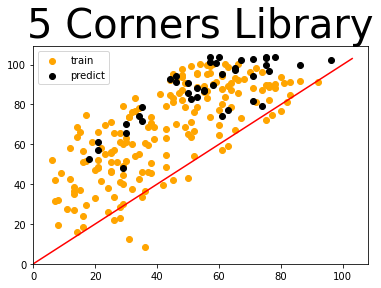

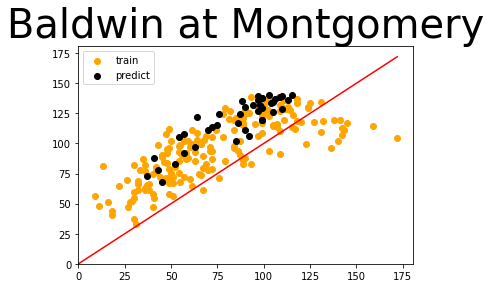

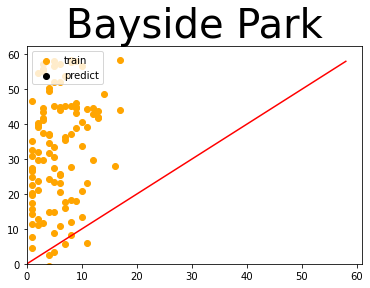

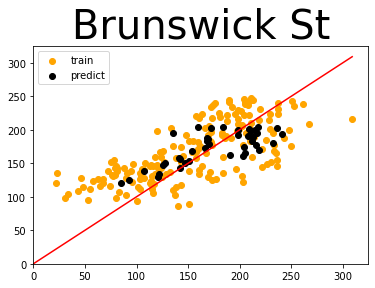

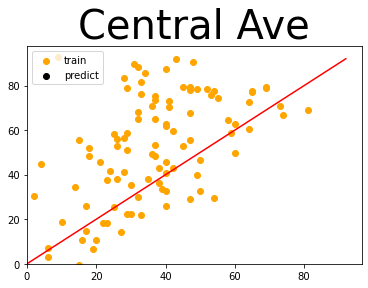

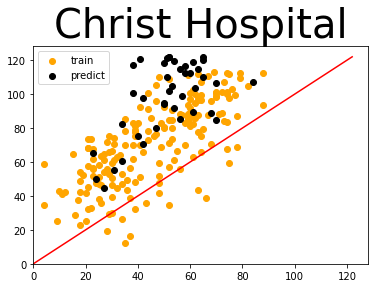

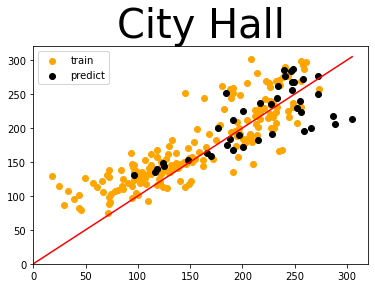

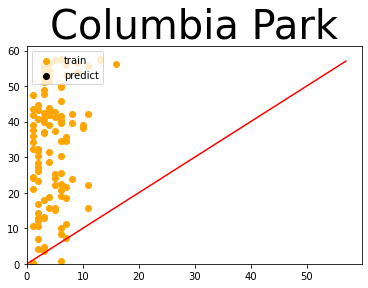

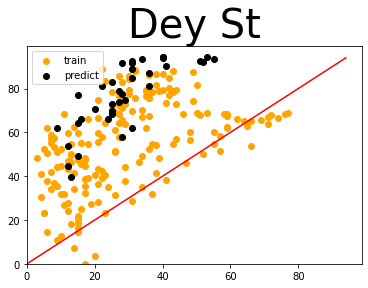

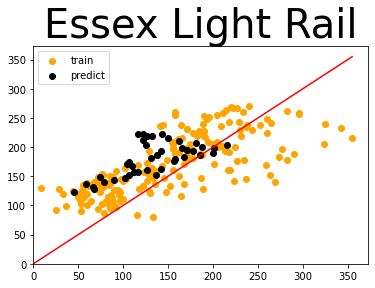

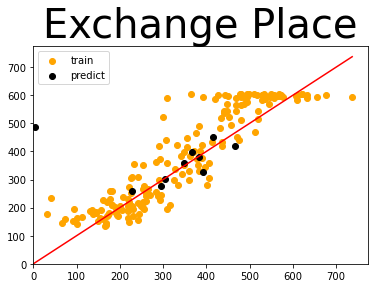

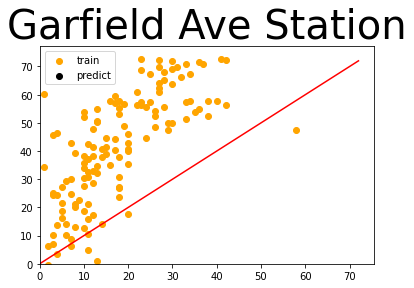

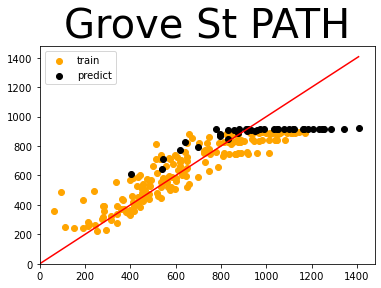

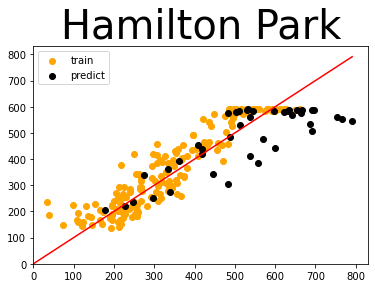

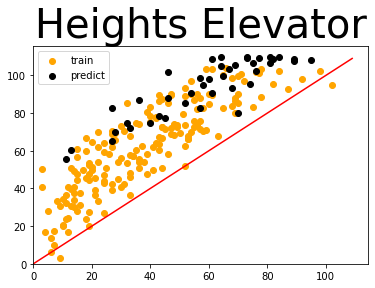

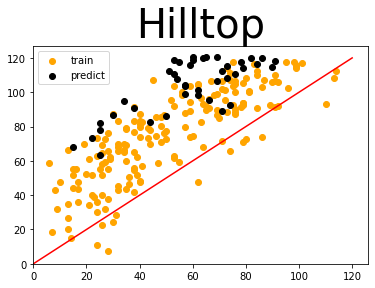

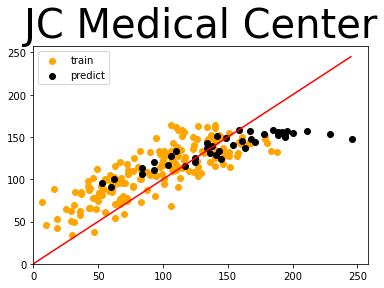

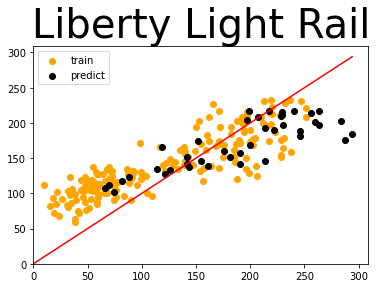

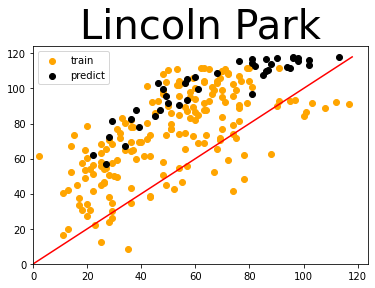

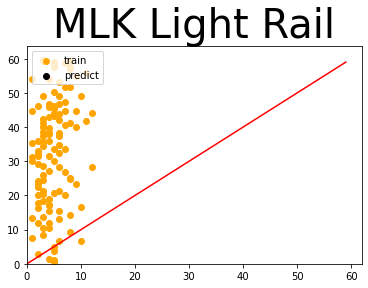

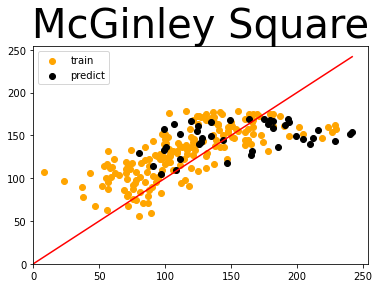

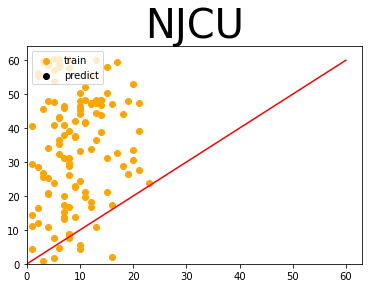

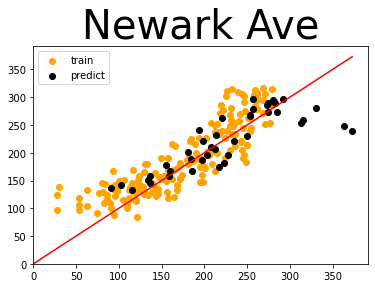

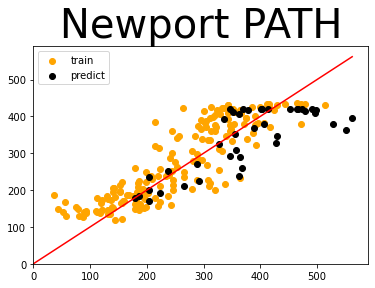

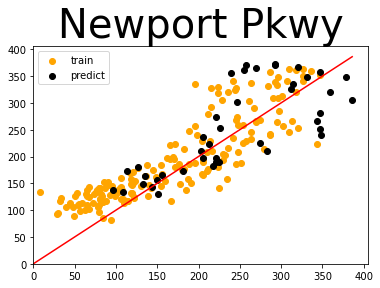

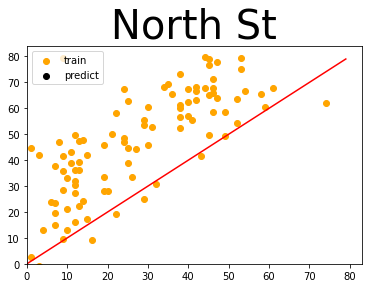

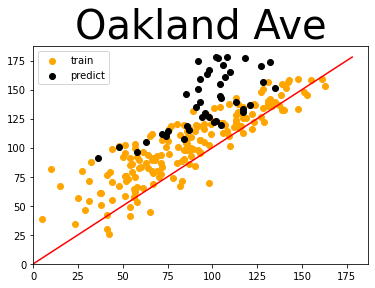

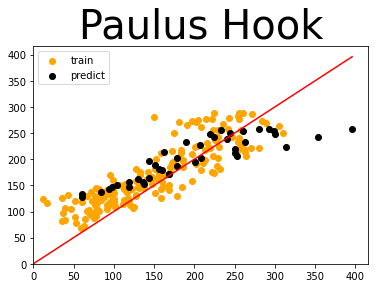

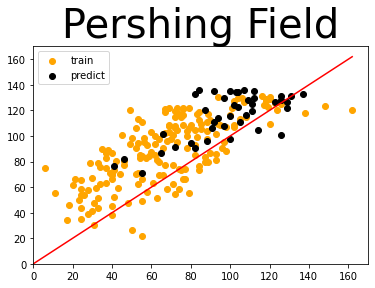

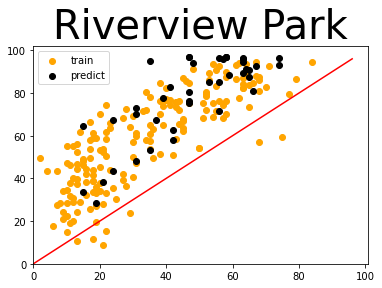

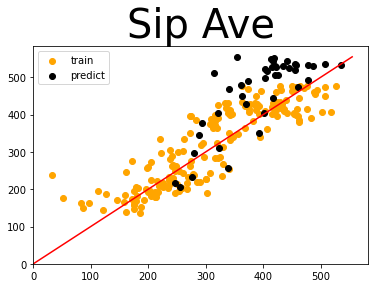

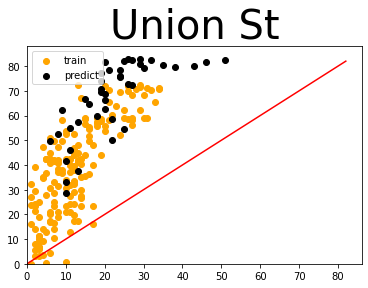

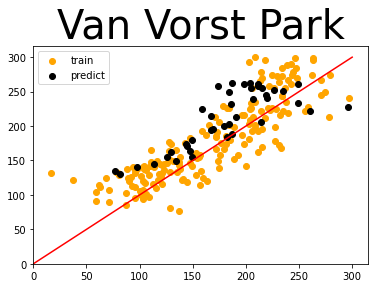

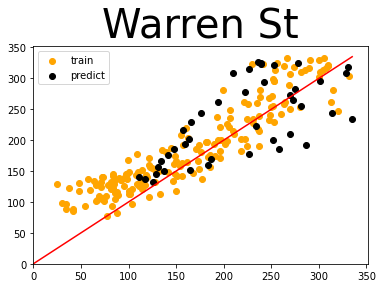

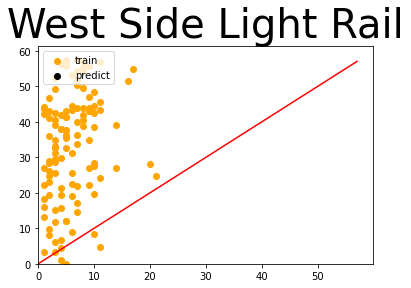

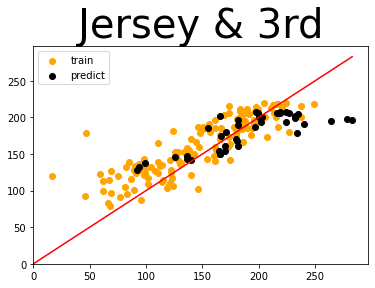

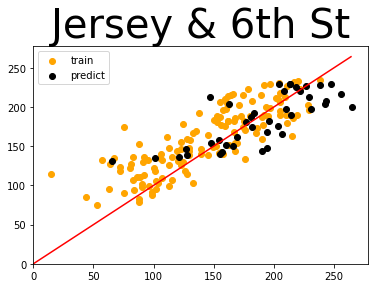

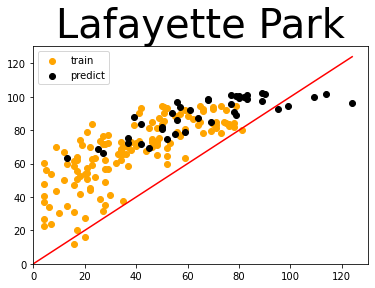

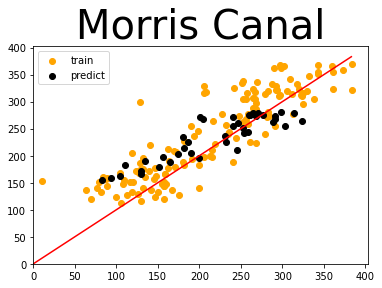

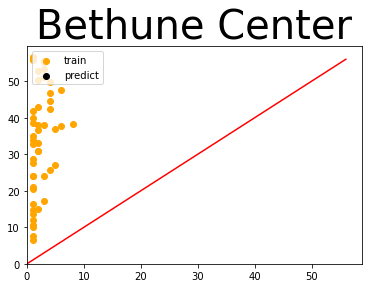

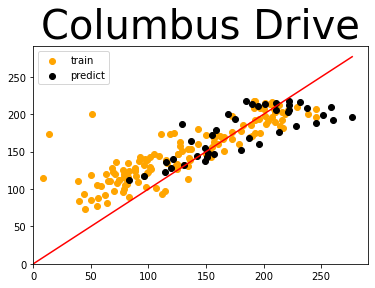

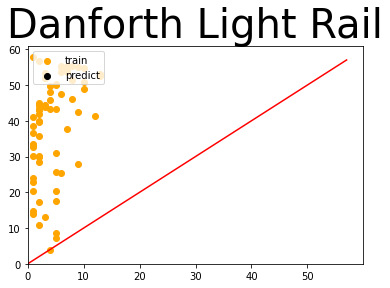

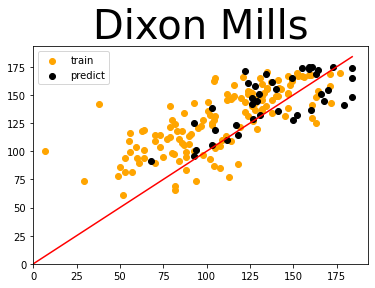

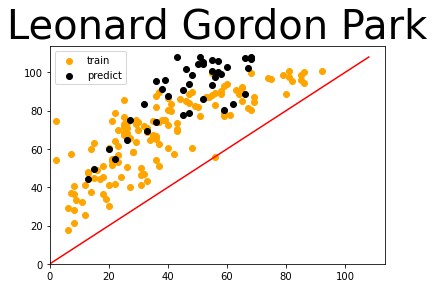

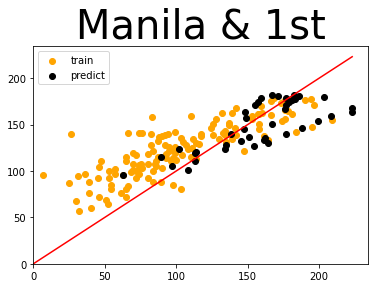

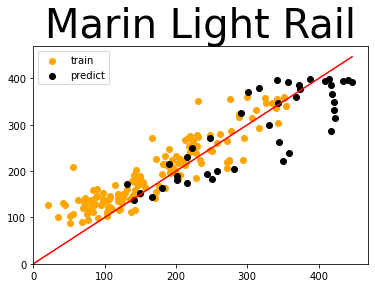

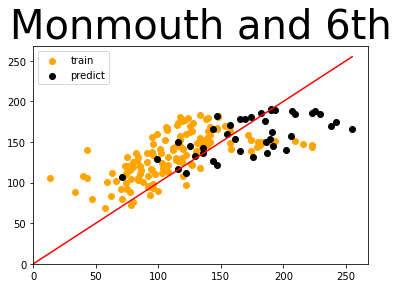

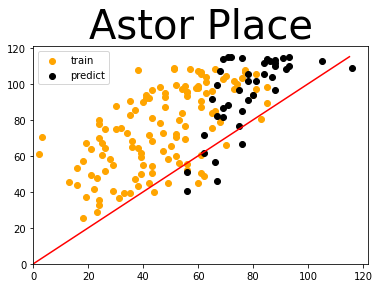

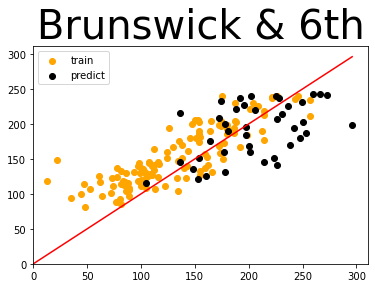

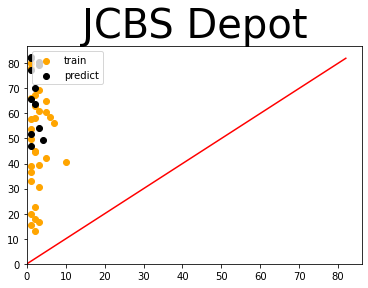

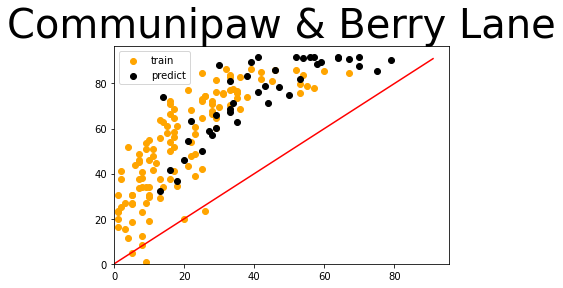

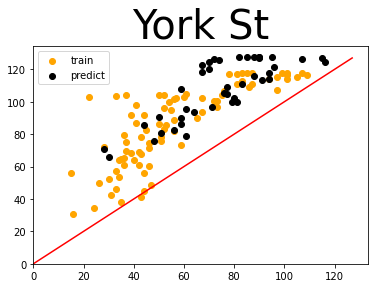

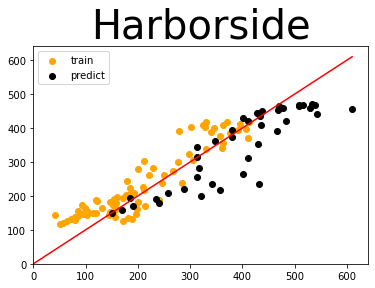

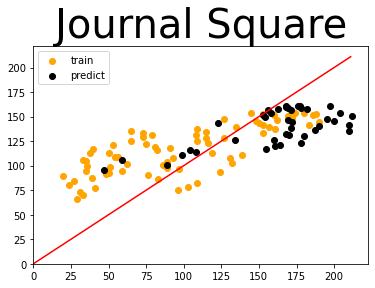

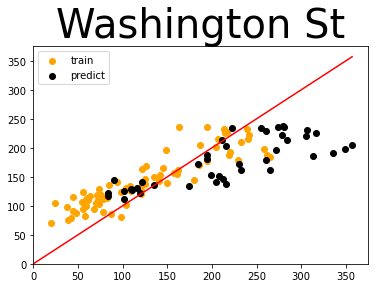

In [ ]:
#show result data scatter

for station in stationnames:
    plt.title(label=station,
          fontsize=40,
          color="black")
    predict_train = model.predict(x_train)
    y1 = y_scaler.inverse_transform(y_train).reshape(  y_train.shape[0])
    y2 = y_scaler.inverse_transform(predict_train).reshape(  y_train.shape[0])
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    
    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)
     
   
    plt.scatter(test1['y'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test)
    y1 = y_scaler.inverse_transform(y_test).reshape(  y_test.shape[0])
    y2 = y_scaler.inverse_transform(predict_test).reshape(  y_test.shape[0])
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    plt.scatter(test2['y'],test2['y2'],label='predict' , color = 'black' )
    #print(test2)
    maxdata1 = (test1['y'].max())if(test1['y'].max() > test1['y2'].max()) else test1['y2'].max()
    maxdata1 = int(maxdata1)
    maxdata2 = (test2['y'].max())if(test2['y'].max() > test2['y2'].max()) else test2['y2'].max()
    maxdata2 = int( 0 if(np.isnan(maxdata2)) else maxdata2)
    maxdata = (maxdata1)if(maxdata1 > maxdata2) else maxdata2
    maxdata = int(maxdata)
    

    xline =   np.linspace(0,maxdata,maxdata)
    plt.plot([0,maxdata],[0,maxdata] , color='red')
    plt.ylim(bottom=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'scatter.jpg',bbox_inches='tight', dpi=150)
    plt.show()